In [8]:
import sys
sys.path.append('../src')
import numpy as np
import os
from evaluation import load_dataset, load_results, compute_scores, plot_samples

In [17]:
def print_scores_sub(folder_data, name_data, folder_result, filename_base, num_tests, is_ordered):
    images, labels = load_dataset(folder_data, name_data)
    scores_list = {key: [] for key in ['LL_M', 'LL_S', 'AMI', 'ARI', 'RMSE', 'OCA']}
    if is_ordered:
        scores_list['OOA'] = []
    for model_id in range(num_tests):
        results = load_results(folder_result, filename_base.format(model_id))
        scores = compute_scores(results, labels, is_ordered)
        for key in scores_list:
            if key in ['LL_M', 'LL_S']:
                scores_list[key].append(scores[key])
            elif key in ['RMSE']:
                scores_list[key].append(scores[key] * 1e1)
            else:
                scores_list[key].append(scores[key] * 1e2)
    scores_mean = {key: np.mean(val) for key, val in scores_list.items()}
    scores_std = {key: np.std(val) for key, val in scores_list.items()}
    print('LL_M:{:7.5g} {:.0e}'.format(scores_mean['LL_M'], scores_std['LL_M']), end=' ' * 3)
    print('LL_S:{:7.5g} {:.0e}'.format(scores_mean['LL_S'], scores_std['LL_S']))
    print('AMI(%):{:5.3g} {:.0e}'.format(scores_mean['AMI'], scores_std['AMI']), end=' ' * 3)
    print('ARI(%):{:5.3g} {:.0e}'.format(scores_mean['ARI'], scores_std['ARI']), end=' ' * 3)
    print('RMSE(e-1):{:4.2g} {:.0e}'.format(scores_mean['RMSE'], scores_std['RMSE']), end=' ' * 3)
    print('OCA(%):{:5.3g} {:.0e}'.format(scores_mean['OCA'], scores_std['OCA']), end=' ' * 3)
    if is_ordered:
        print('OOA(%):{:5.3g} {:.0e}'.format(scores_mean['OOA'], scores_std['OOA']), end='')
    print()
    plot_samples(images, results)
    return

def print_scores(mode, num_objects='2_3', filename_base='result_{}.h5', num_tests=5):
    for name_data_base in name_data_base_list:
        is_ordered = False if mode == 'sep' else name_data_base in ['rgb_1', 'rgb_3']
        for name_data_sub in name_data_sub_list:
            print('{}_{}'.format(name_data_base, name_data_sub))
            folder_data = os.path.join(folder_data_base, '{}_{}'.format(mode, name_data_base))
            name_data = '{}_{}'.format(name_data_sub, num_objects)
            folder_result = '{}_{}_{}'.format(mode, name_data_base, name_data_sub)
            print_scores_sub(folder_data, name_data, folder_result, filename_base, num_tests, is_ordered)
    return

folder_data_base = '../data'
# name_data_base_list = ['gray', 'rgb_1', 'rgb_2', 'rgb_3', 'rgb_4']
name_data_base_list = ['rgb_4']
name_data_sub_list = ['shapes','mnist']

In [ ]:
# Evaluate on images containing 2 or 3 objects (without occlusion)
print_scores('sep')

rgb_4_shapes
LL_M: 1939.2 3e-01   LL_S: 1938.3 4e-01
AMI(%): 92.4 5e-02   ARI(%): 93.8 5e-02   RMSE(e-1): 1.4 7e-03   OCA(%): 89.3 9e-02   
rgb_4_mnist
LL_M: 1871.5 1e-01   LL_S: 1871.3 1e-01
AMI(%): 55.7 3e-02   ARI(%): 57.9 4e-02   RMSE(e-1): 3.1 2e-03   OCA(%): 51.1 7e-02   


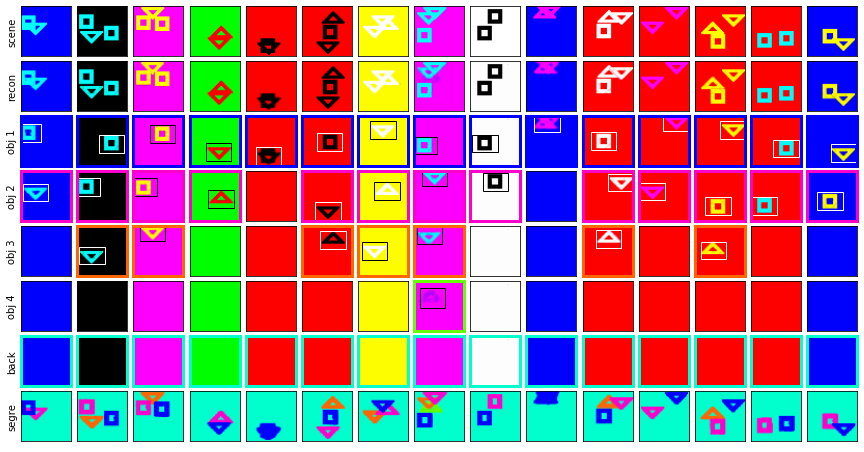

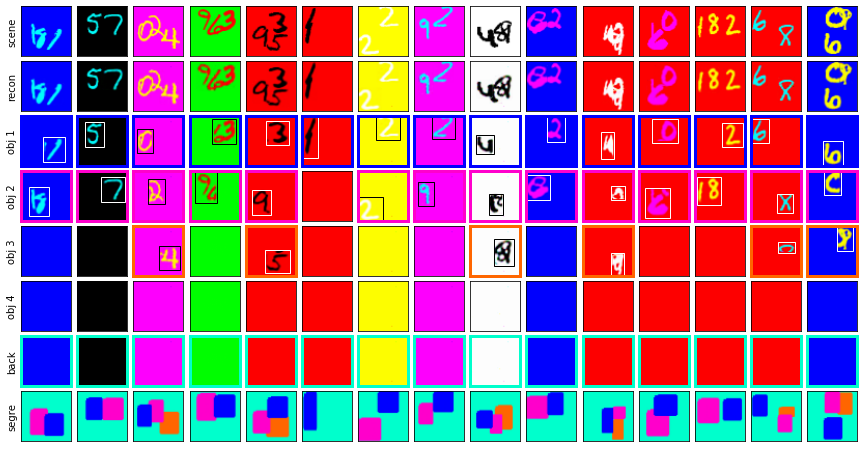

In [18]:
# Evaluate on images containing 2 or 3 objects (with occlusion)
print_scores('occ')

In [ ]:
# Evaluate on images containing 4 objects (without occlusion, K = 4)
print_scores('sep', num_objects='4', filename_base='general_4_result_{}.h5')

In [ ]:
# Evaluate on images containing 4 objects (without occlusion, K = 10)
print_scores('sep', num_objects='4', filename_base='general_10_result_{}.h5')

rgb_4_shapes
LL_M: 1860.9 2e+00   LL_S: 1850.6 2e+00
AMI(%): 89.9 7e-02   ARI(%): 92.1 7e-02   RMSE(e-1): 2.1 1e-02   OCA(%): 76.2 1e-01   
rgb_4_mnist
LL_M: 1809.2 1e-01   LL_S: 1808.5 1e-01
AMI(%): 53.1 2e-02   ARI(%): 53.2 2e-02   RMSE(e-1): 3.9 1e-03   OCA(%): 29.8 1e-01   


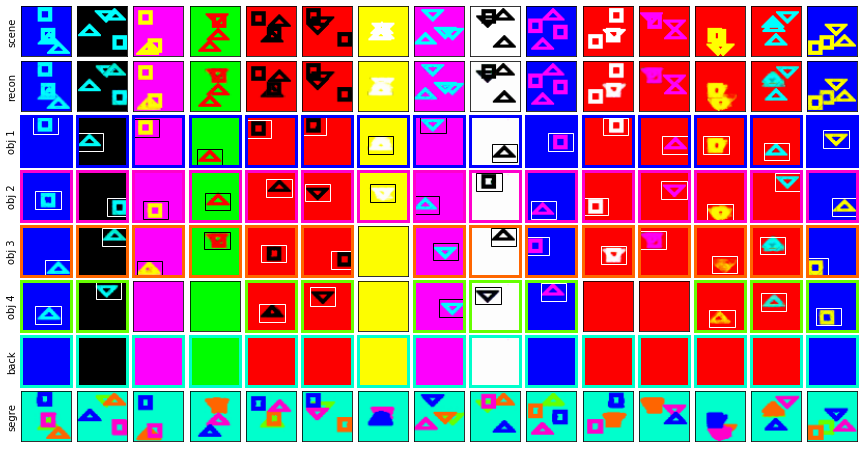

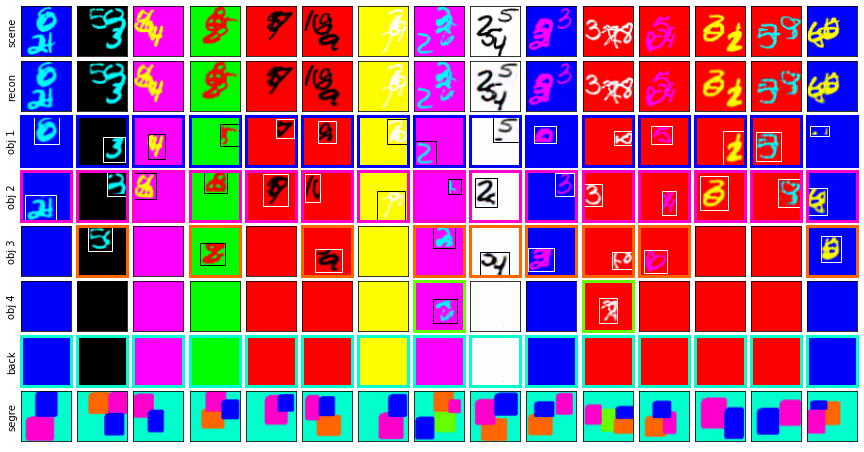

In [19]:
# Evaluate on images containing 4 objects (with occlusion, K = 4)
print_scores('occ', num_objects='4', filename_base='general_4_result_{}.h5')

rgb_4_shapes
LL_M: 1886.4 5e-01   LL_S: 1878.9 6e-01
AMI(%): 90.5 2e-02   ARI(%): 92.7 2e-02   RMSE(e-1):   2 4e-03   OCA(%): 64.4 2e-01   
rgb_4_mnist
LL_M: 1809.7 1e-01   LL_S: 1808.9 1e-01
AMI(%):   53 3e-02   ARI(%): 53.2 2e-02   RMSE(e-1): 3.8 1e-03   OCA(%):   29 3e-02   


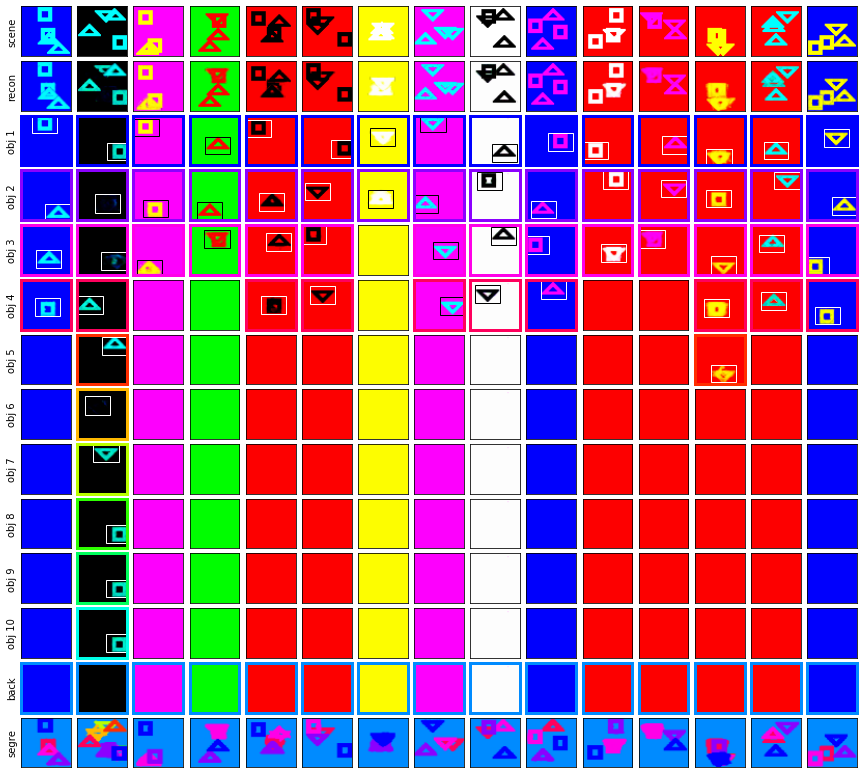

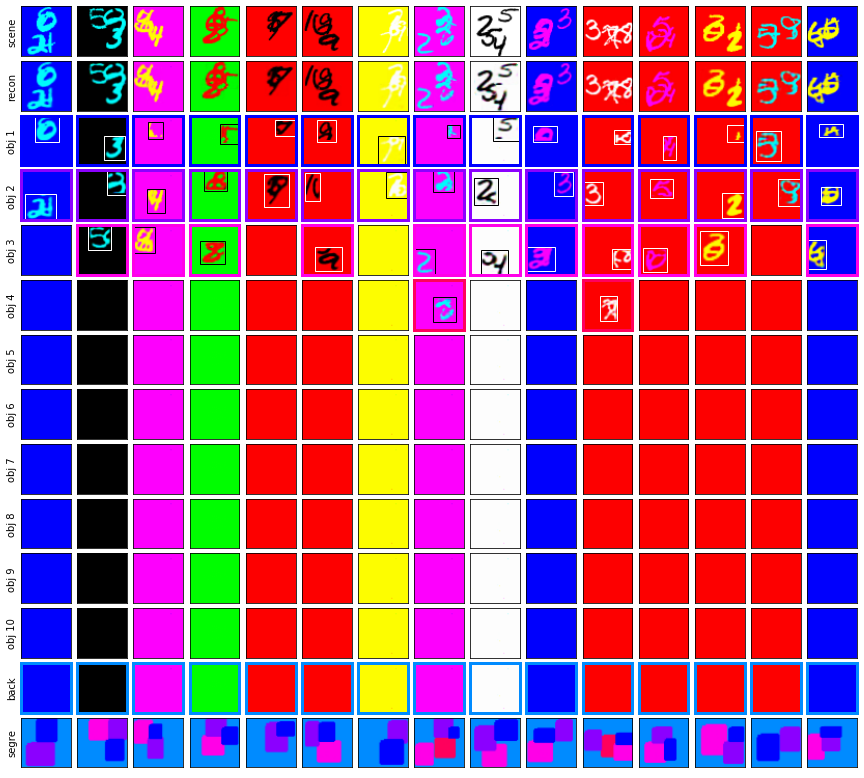

In [20]:
# Evaluate on images containing 4 objects (with occlusion, K = 10)
print_scores('occ', num_objects='4', filename_base='general_10_result_{}.h5')